In [138]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
%matplotlib inline

In [150]:
class logread:
    def __init__(self):
        self.logdir="logs"
        self.delimiter="\t"
        self.lognames=self.read_all_log_folders()
        self.detaildata=[]
        self.traindata=[]
        self.fulltraineddata=[]
        for folder in self.lognames:
            self.detaildata.append(self.read_linebyline(folder,"details.log"))
            self.traindata.append(self.read_train(folder))
            self.fulltraineddata.append(self.read_linebyline(folder,"full_trained.log"))
    def read_all_log_folders(self):
        lista=[]
        for filename in os.listdir(os.getcwd()+"/"+self.logdir):
            lista.append(filename)
        return lista
    def read_train(self,folder):
        train_logs=[]
        with open(self.logdir+"/"+folder+"/"+"train.log") as f:
            for line in f:
                if "START" in line:
                    temptrain=[]
                elif "STOP" in line:
                    train_logs.append(temptrain)
                else: 
                    temptrain.append(line.rstrip('\n').split(self.delimiter))
        return train_logs
    def read_linebyline(self,folder,logname):
        logs=[]
        if os.path.exists(self.logdir+"/"+folder+"/"+logname):
            with open(self.logdir+"/"+folder+"/"+logname) as f:
                for line in f:
                    logs.append(line.rstrip('\n').split(self.delimiter))
        else:
            print("No logfile found")
        return logs
    
    def plot_fulltrains(self):
        for i in range(len(self.detaildata)):
            print(self.detaildata[i])
            lenlist=[]
            trainlist=[]
            testlist=[]
            sumlist=[]
            for j in range(len(self.fulltraineddata[i])):
                lenlist.append(len(self.fulltraineddata[i][j])-5)
                trainlist.append(float(self.fulltraineddata[i][j][1]))
                testlist.append(float(self.fulltraineddata[i][j][3]))
                sumlist.append(sum(list(map(int, self.fulltraineddata[i][j][5:]))))
            plt.plot(sumlist,trainlist,'ro',sumlist,testlist,'g^')

            plt.show()
    

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '40'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7fa10f9251e0>'], ['population_size', '40']]


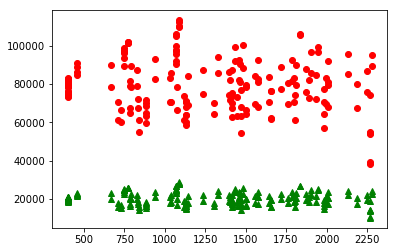

[['Language', 'Hun'], ['Wordcount', '748072'], ['Unique words', '135416'], ['Population size', '40'], ['Encoding dim', '60'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7fe3d4ea51e0>'], ['population_size', '40']]


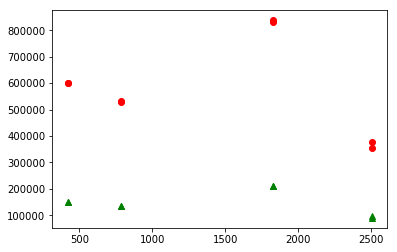

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '60'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7f18ae7df378>'], ['population_size', '40']]


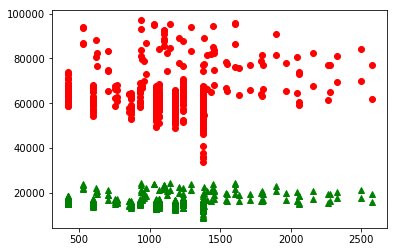

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '20'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7ff91b0251e0>'], ['population_size', '40']]


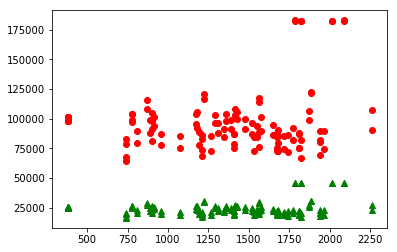

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '120'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7f06e8ce51e0>'], ['population_size', '40']]


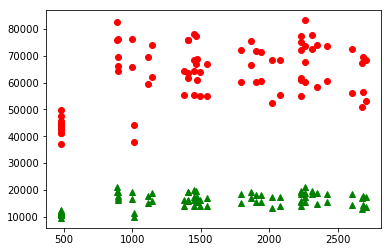

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '100'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7f6b10886378>'], ['population_size', '40']]


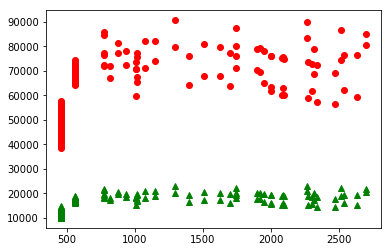

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '60'], ['Encoder type', 'Autoencoder'], ['nonlinear', '<function relu at 0x7fee2f146378>'], ['population_size', '40']]


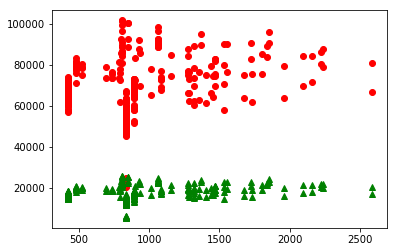

In [153]:
log=logread()

log.plot_fulltrains()